In [ ]:
import pandas as pd
import numpy as np
import warnings


In [ ]:
warnings.filterwarnings('ignore')
train_data = pd.read_csv("alldata.csv", encoding="windows_1258")
train_data.head(5)

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
3,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .


In [ ]:
train_data.isnull().sum().sum()

0

In [ ]:
train_data.rename(columns={'neutral': 'Sentiment',
                   'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .': 'News'},
          inplace=True, errors='raise')

In [ ]:
train_data

,Sentiment,News
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
3,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .
4841,neutral,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres ."
4842,negative,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn ."
4843,negative,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn ."


In [ ]:
pd.set_option('max_colwidth',1800)
train_data[train_data.Sentiment == 1][0:5]

,Sentiment,News


In [ ]:
train_data[train_data.Sentiment == 1][0:5]

,Sentiment,News


In [ ]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4845 non-null   object
 1   News       4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


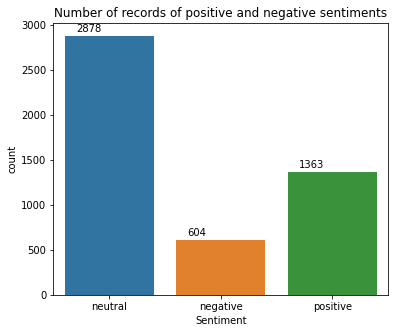

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.figure(figsize=(6,5))
plt.title("Number of records of positive and negative sentiments")
plot = sn.countplot(x = 'Sentiment', data=train_data)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+0.1 ,p.get_height()+50))


In [ ]:
train_data = train_data[train_data.Sentiment != 'neutral']

In [ ]:
score = train_data["Sentiment"].values
sentiment = []
for i in score:
    if i == 'positive' :
        sentiment.append(1)
    elif i == 'negative' :
        sentiment.append(-1)
    
train_data["Sentiment"] = sentiment
train_data.head()

,Sentiment,News
1,-1,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
2,1,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
3,1,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."
4,1,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .
5,1,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m ."


In [ ]:
train_data

,Sentiment,News
1,-1,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
2,1,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
3,1,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."
4,1,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .
5,1,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m ."
...,...,...
4839,-1,"HELSINKI Thomson Financial - Shares in Cargotec fell sharply in early afternoon trade after the cargo handling group posted a surprise drop in April-June profits , which overshadowed the large number of new orders received during the three months ."
4840,-1,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .
4842,-1,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn ."
4843,-1,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn ."


# Creating Count Vectors for Dataset

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorize = CountVectorizer()

In [ ]:
type(train_data.News)

pandas.core.series.Series

In [ ]:
feature_vector =  count_vectorize.fit(train_data.News)

In [ ]:
features = feature_vector.get_feature_names()

In [ ]:
print("total number of features: ", len(features))


total number of features:  5501


In [ ]:
import random

In [ ]:
random.sample(features,10)

['qt',
 'least',
 'follow',
 '4mn',
 'asx',
 'chance',
 '37',
 'weather',
 'nodes',
 'orange']

# Displaying Document Vectors

# Removing Low_Frequency Words

In [ ]:
count_vectorizer =  CountVectorizer(max_features=2010)

In [ ]:
feature_vector = count_vectorizer.fit(train_data.News)

In [ ]:
features = feature_vector.get_feature_names()

# Remove Stop Words

In [ ]:
from sklearn.feature_extraction import text

In [ ]:
my_stop_words = text.ENGLISH_STOP_WORDS

In [ ]:
print("Few stop words: ", list(my_stop_words)[0:10])

Few stop words:  ['who', 'been', 'only', 'almost', 'eg', 'anyhow', 'thru', 'same', 'the', 'about']


# Distribution of words Across Different sentiment

In [ ]:
from nltk.stem.snowball import PorterStemmer

In [ ]:
stemmer = PorterStemmer()

def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

train_data["News"] = train_data["News"].apply(lambda text: stem_words(text))
train_data.head()
   

,Sentiment,News
1,-1,"the intern electron industri compani elcoteq ha laid off ten of employe from it tallinn facil ; contrari to earlier layoff the compani contract the rank of it offic worker , the daili postime report ."
2,1,with the new product plant the compani would increas it capac to meet the expect increas in demand and would improv the use of raw materi and therefor increas the product profit .
3,1,"accord to the compani 's updat strategi for the year 2009-2012 , baswar target a long-term net sale growth in the rang of 20 % -40 % with an oper profit margin of 10 % -20 % of net sale ."
4,1,financ of aspocomp 's growth aspocomp is aggress pursu it growth strategi by increasingli focus on technolog more demand hdi print circuit board pcb .
5,1,"for the last quarter of 2010 , componenta 's net sale doubl to eur131m from eur76m for the same period a year earlier , while it move to a zero pre-tax profit from a pre-tax loss of eur7m ."


In [ ]:
count_vectorizer =  CountVectorizer(stop_words= my_stop_words, max_features= 2010)

In [ ]:
feature_vector =  count_vectorizer.fit(train_data.News)

In [ ]:
train_ds_features =  count_vectorizer.transform(train_data.News)

In [ ]:
features = feature_vector.get_feature_names()

In [ ]:
features_counts = np.sum(train_ds_features.toarray(), axis = 0)

In [ ]:
features_counts = pd.DataFrame(dict(features =  features, counts = features_counts))

In [ ]:
features_counts.sort_values("counts", ascending= False)[0:15]

,features,counts
664,eur,775
1196,mn,465
461,compani,380
1432,profit,368
1999,year,333
1293,oper,331
1579,said,307
1583,sale,306
766,finnish,305
1234,net,301


In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =  train_test_split(train_ds_features, train_data.Sentiment, 
                                                     test_size = 0.3, random_state = 50)

In [ ]:
train_x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
test_x

<591x2010 sparse matrix of type '<class 'numpy.int64'>'
	with 6630 stored elements in Compressed Sparse Row format>

In [ ]:
train_y

4768   -1
4339   -1
869     1
285     1
4447   -1
       ..
2730   -1
130     1
4797   -1
4105   -1
4548   -1
Name: Sentiment, Length: 1376, dtype: int64

In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit(train_x.toarray(), train_y)

BernoulliNB()

# Saving Model

In [ ]:
import pickle

filename = 'news_classification_nb.sav'
pickle.dump(nb_clf, open(filename, 'wb'))

In [ ]:
test_ds_predicted = nb_clf.predict(test_x.toarray())

In [ ]:
from sklearn import metrics
print(metrics.classification_report(test_y,test_ds_predicted))

              precision    recall  f1-score   support

          -1       0.79      0.71      0.75       190
           1       0.87      0.91      0.89       401

    accuracy                           0.85       591
   macro avg       0.83      0.81      0.82       591
weighted avg       0.84      0.85      0.84       591



<AxesSubplot:>

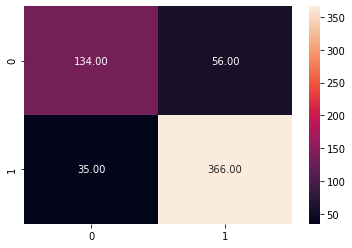

In [ ]:
cm = metrics.confusion_matrix(test_y, test_ds_predicted)
sn.heatmap(cm, annot=True, fmt = '.2f')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, test_ds_predicted)

0.8460236886632826

In [ ]:
df = pd.read_csv("final_news_apple.csv")

In [ ]:
df

,Date,Headline,Movement
0,2012-07-16,Waiting For Direction On The Markets,1
1,2012-07-19,Mid Year Update U S And Canadian Stock Markets By Sector,1
2,2012-07-23,Trade Apple After Earnings,0
3,2012-07-23,Apple Earnings Preview Quarterly Dip On Deck,0
4,2012-07-23,Summer Heat Scorches Europe And U S,0
...,...,...,...
22087,2022-06-21,Tencent forms 'extended reality' unit as metaverse race gathers steam - sources,1
22088,2022-06-21,"US STOCKS-Megacap, energy shares lead broad Wall Street rebound",1
22089,2022-06-22,Volkswagen CEO questions whether Apple plans to produce cars,0
22090,2022-06-22,"Shopify unveils new tools, Twitter tie-up to beat e-commerce slowdown",0


In [ ]:
#featureVector
fv =  count_vectorize.fit(df.Headline)

In [ ]:
features = fv.get_feature_names()

In [ ]:
print("total number of features: ", len(features))

total number of features:  14783


In [ ]:
pred_ds_features = count_vectorize.transform(df.Headline)

In [ ]:
#Removing Low frequency words
features_counts = np.sum(pred_ds_features.toarray(),axis=0)

In [ ]:
f_counts_df = pd.DataFrame(dict(features = features, counts = features_counts))

In [ ]:
plt.figure(figsize=(8,6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

(array([1.3973e+04, 4.1800e+02, 1.4000e+02, 6.7000e+01, 5.1000e+01,
        1.9000e+01, 1.6000e+01, 1.2000e+01, 1.0000e+01, 1.3000e+01,
        1.4000e+01, 5.0000e+00, 4.0000e+00, 2.0000e+00, 8.0000e+00,
        2.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00]),
 array([   0.,   40.,   80.,  120.,  160.,  200.,  240.,  280.,  320.,
         360.,  400.,  440.,  480.,  520.,  560.,  600.,  640.,  680.,
         720.,  760.,  800.,  840.,  880.,  920.,  960., 1000., 1040.,
        1080., 1120., 1160., 1200., 1240., 1280., 1320., 1360., 1400.,
        1440., 1480., 1520., 1560.

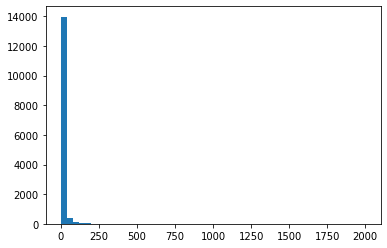

In [ ]:
plt.hist(f_counts_df.counts, bins=50, range=(0,2000))

In [ ]:
count_vectorizer =  CountVectorizer(max_features=2010)

In [ ]:
feat_vec = count_vectorizer.fit(df.Headline)

In [ ]:
feat = feat_vec.get_feature_names()

In [ ]:
pred_ds_features = count_vectorizer.transform(df.Headline)

In [ ]:
feats_counts =  np.sum(pred_ds_features.toarray(),axis=0)

In [ ]:
feats_counts = pd.DataFrame(dict(features = feat, counts = feats_counts))

In [ ]:
feats_counts.sort_values('counts', ascending=False)[0:15]

,features,counts
1799,to,5524
137,apple,4766
883,in,3682
708,for,2909
1691,stocks,2865
1212,on,2856
1776,the,2522
556,earnings,2487
1198,of,2074
152,as,1951


In [ ]:
stemmer = PorterStemmer()

def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["Headline"] = df["Headline"].apply(lambda text: stem_words(text))
df.head()

,Date,Headline,Movement
0,2012-07-16,wait for direct on the market,1
1,2012-07-19,mid year updat u s and canadian stock market by sector,1
2,2012-07-23,trade appl after earn,0
3,2012-07-23,appl earn preview quarterli dip on deck,0
4,2012-07-23,summer heat scorch europ and u s,0


In [ ]:
pred_ds_features

<22092x2010 sparse matrix of type '<class 'numpy.int64'>'
	with 167706 stored elements in Compressed Sparse Row format>

In [ ]:
prediction_ds_predicted = nb_clf.predict(pred_ds_features.toarray())

In [ ]:
pos= 0 
neg = 0
for i in prediction_ds_predicted:
    if i==1:
        pos+=1
    else:
        neg+=1

In [ ]:
pos/len(prediction_ds_predicted)

0.8391272858953467

In [ ]:
neg/len(prediction_ds_predicted)

0.16087271410465326

In [ ]:
def pipeline(train_data,nb_clf):
    stemmer = PorterStemmer()
    def stem_words(text):
        return " ".join([stemmer.stem(word) for word in text.split()])

    train_data["Headline"] = train_data["Headline"].apply(lambda text: stem_words(text))
    
    count_vectorizer =  CountVectorizer(stop_words= my_stop_words, max_features= 2010)
    
    feature_vector =  count_vectorizer.fit(train_data.Headline)

    train_ds_features =  count_vectorizer.transform(train_data.Headline)

    predictedSentiment = nb_clf.predict(train_ds_features.toarray())

    return predictedSentiment


In [ ]:
ar = pipeline(df,nb_clf)

In [ ]:
ar

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
pos= 0 
neg = 0
for i in ar:
    if i== 1:
        pos+=1
    else:
        neg+=1

In [ ]:
pos/len(ar)

0.839579938439254

In [ ]:
neg/len(ar)

0.16042006156074598